# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Muhammad Arief Hidayah]
- **Email:** [M322D4KY2079@bangkit.academy]
- **ID Dicoding:** [M322D4KY2079]

## Menentukan Pertanyaan Bisnis

- Bagaimana impact dari Weather terhadap user count?
- Bagaimana perbedaan total count pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [157]:
days_df = pd.read_csv("Data\day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [158]:
hour_df = pd.read_csv("Data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [159]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [160]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [161]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

days_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [162]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [163]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [164]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [165]:
## Mengubah tipe data pada beberapa kolom

days_df['dteday'] = pd.to_datetime(days_df['dteday'])
days_df['season'] = days_df.season.astype('category')
days_df['yr'] = days_df.yr.astype('category')
days_df['mnth'] = days_df.mnth.astype('category')
days_df['holiday'] = days_df.holiday.astype('category')
days_df['weekday'] = days_df.weekday.astype('category')
days_df['workingday'] = days_df.workingday.astype('category')
days_df['weathersit'] = days_df.weathersit.astype('category')

In [166]:
# Drop kolom yang tidak digunakan dalam data
days_df = days_df.drop("instant", axis=1)
days_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [167]:
# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
days_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
days_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
days_df.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
days_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
days_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
days_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

In [168]:
# Merubah nama kolom
days_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

In [169]:
days_df.head(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,2011-01-06,Winter,2011,Jan,0,Thursday,Yes,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,2011-01-07,Winter,2011,Jan,0,Friday,Yes,Misty,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,2011-01-08,Winter,2011,Jan,0,Saturday,No,Misty,0.165000,0.162254,0.535833,0.266804,68,891,959
8,2011-01-09,Winter,2011,Jan,0,Sunday,No,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,2011-01-10,Winter,2011,Jan,0,Monday,Yes,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## Exploratory Data Analysis (EDA)

### Explore ...

In [180]:
days_df.describe(include="all")

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731,731,731.0,731,731.0,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2.0,12,2.0,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,2012.0,Jan,0.0,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366.0,62,710.0,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [181]:
days_df.sort_values(by="total_count", ascending=False)

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
623,2012-09-15,Summer,2012,Sep,0,Saturday,No,Clear,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,2012-09-29,Fall,2012,Sep,0,Saturday,No,Clear,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,2012-09-22,Summer,2012,Sep,0,Saturday,No,Clear,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,2012-03-23,Spring,2012,Mar,0,Friday,Yes,Misty,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,2012-05-19,Spring,2012,May,0,Saturday,No,Clear,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2011-03-06,Winter,2011,Mar,0,Sunday,No,Misty,0.376522,0.366252,0.948261,0.343287,114,491,605
25,2011-01-26,Winter,2011,Jan,0,Wednesday,Yes,Light_RainSnow,0.217500,0.203600,0.862500,0.293850,34,472,506
725,2012-12-26,Winter,2012,Dec,0,Wednesday,Yes,Light_RainSnow,0.243333,0.220333,0.823333,0.316546,9,432,441
26,2011-01-27,Winter,2011,Jan,0,Thursday,Yes,Clear,0.195000,0.219700,0.687500,0.113837,15,416,431


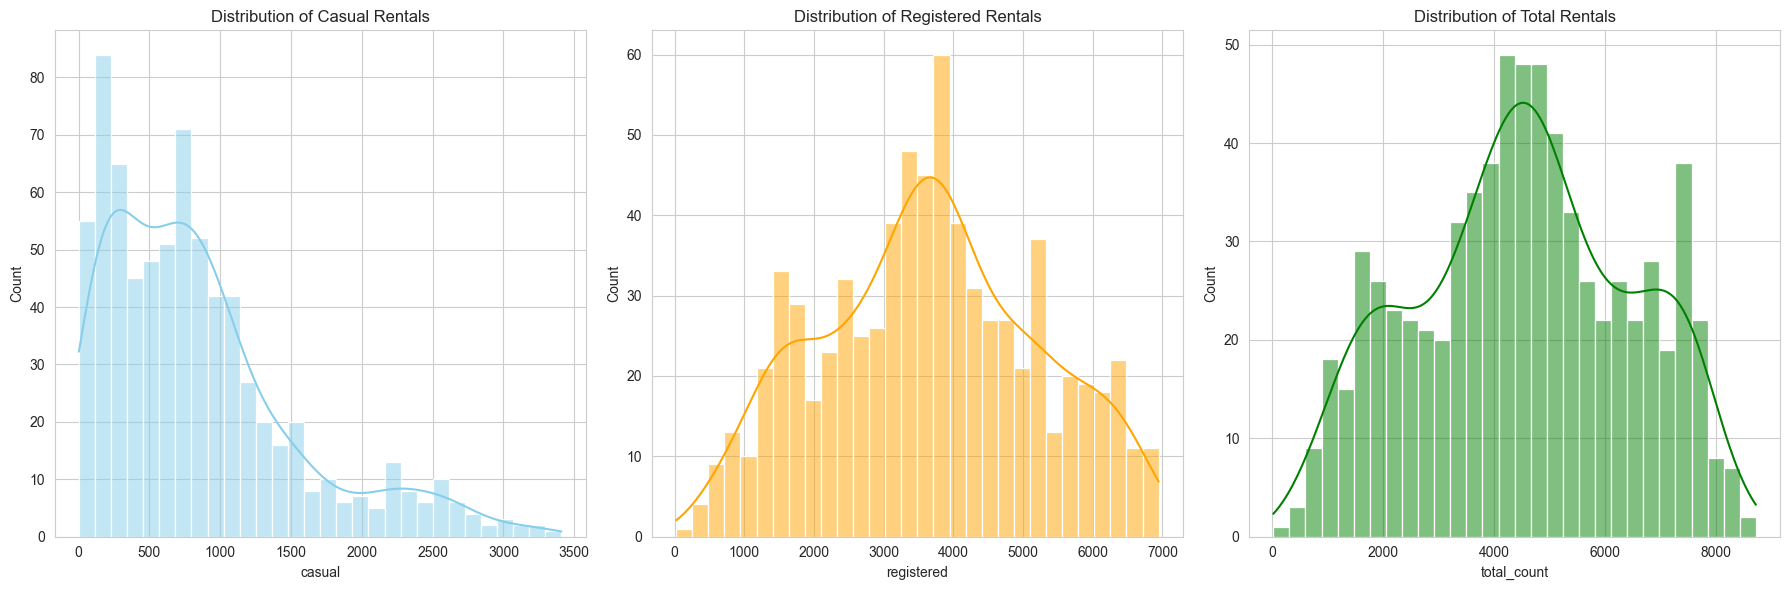

In [177]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of bike rentals
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(days_df['casual'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Distribution of Casual Rentals')

sns.histplot(days_df['registered'], bins=30, ax=ax[1], kde=True, color='orange')
ax[1].set_title('Distribution of Registered Rentals')

sns.histplot(days_df['total_count'], bins=30, ax=ax[2], kde=True, color='green')
ax[2].set_title('Distribution of Total Rentals')

plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [170]:
# Define the order of the weather categories
weather_order = ['Clear', 'Misty', 'Light_RainSnow', 'Heavy_RainSnow']

# Create the box plot with Plotly Express
fig = px.box(days_df, x='weather', y='total_count', category_orders={'weather': weather_order},
             labels={'total_count': 'Total Bike Rentals'}, title='Impact of Weather on User Count')

# Update x-axis tick labels
fig.update_xaxes(tickvals=weather_order, ticktext=['Clear', 'Misty', 'Light_RainSnow', 'Heavy_RainSnow'])

# Show the figure
fig.show()


### Pertanyaan 2:

In [173]:
import plotly.graph_objs as go

# Pivot the data to get total counts per month for each year
monthly_data = days_df.pivot_table(values='total_count', index='month', columns='year', aggfunc='sum')

# Reorder the index based on calendar months for proper sequential visualization
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_data = monthly_data.reindex(months_order)

# Create traces for each year
traces = []
for year in monthly_data.columns:
    trace = go.Scatter(x=monthly_data.index, y=monthly_data[year], mode='lines+markers', name=str(year))
    traces.append(trace)

# Create layout
layout = go.Layout(title='Monthly Total User Counts Comparison: 2011 vs 2012',
                   xaxis=dict(title='Month', tickangle=45),
                   yaxis=dict(title='Total Count of Users'),
                   legend=dict(title='Year'))

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show figure
fig.show()


## Conclusion

- Conclution pertanyaan 1: Dapat kita ketahui dari visualisasi pertanyaan 1, Bahwasanya Weather sangat berimpact pada total user. Pada saat Weather = Clear user bike lebih banyak, dan dapat kita lihat juga untuk heavyrainsnow bahkan tidak ada dikarenakan heavyrainsnow kita tidak bisa menggunakan sepeda dikarenakan weather = buruk. 
Kesimpulan : Ketika bersepeda, Semakin bagus weather semakin banyak pula total count nya(user), Semakin jelek cuaca total count semakin sedikit.
- Conclution pertanyaan 2 : Dapat kita ketahui dari visualisasi pertanyaan 2, Bahwasanya Total User count pada tahun 2012 lebih banyak dari tahun 2011.

In [183]:
days_df.to_csv("days_data.csv", index=False)